In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fastai.vision.all import *

import polvo
import polvo.classification as clf

In [3]:
data_dir = Path.home() / 'data/butterfly'

In [4]:
images_dir = data_dir / 'data/butterfly_mimics/images'
image_files = get_image_files(images_dir)
len(image_files)

853

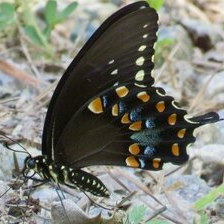

In [5]:
image_file = image_files[0]
PILImage.create(image_file)

In [6]:
df = pd.read_csv(data_dir/'data/butterfly_mimics/images.csv')
df.head()

,image,name,stage,side
0,ggc1e08cbc,monarch,adult,ventral
1,gh150f104b,tiger,adult,both
2,gh20ab0d9c,black,adult,dorsal
3,gh2d5c8c79,monarch,adult,dorsal
4,gh6adf74a4,pipevine,adult,dorsal


In [7]:
stem2label = {o.image: o.name for o in df.itertuples()}

In [8]:
df[df.image == image_file.stem]

,image,name,stage,side
635,uza0e1e047,spicebush,adult,ventral


In [11]:
x_pipe = [PILImage.create]
y_pipe = [attrgetter('stem'), stem2label.__getitem__, Categorize()]

splits = RandomSplitter(seed=42)(image_files)

dss = Datasets(image_files, [x_pipe, y_pipe], splits=splits)

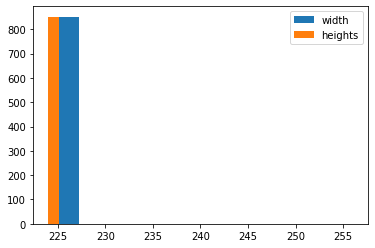

In [13]:
polvo.image_sizes_hist(image_files)

In [14]:
after_item = [ToTensor(), Resize(224)]
after_batch = [IntToFloatTensor, *aug_transforms(size=160, min_scale=0.75, flip_vert=False)]

dls = dss.dataloaders(32, after_item=after_item, after_batch=after_batch)

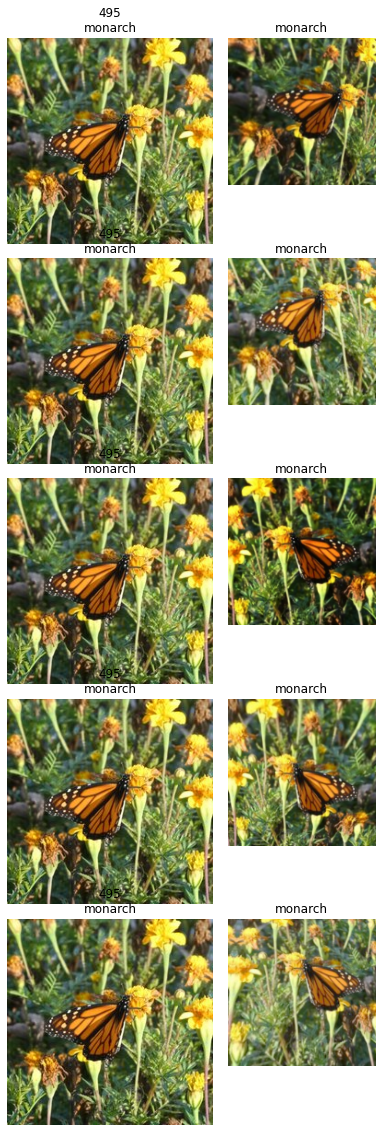

(<Figure size 1008x1440 with 20 Axes>,
 <mpl_toolkits.axes_grid1.axes_grid.ImageGrid at 0x7ff318173a10>)

In [15]:
clf.show_tfms(dls.train, unique_idx=495)

In [16]:
exp = clf.DataExplorer.from_datasets(dss)

In [17]:
exp.most_common()

,label_id,label,item_idx,n_samples
0,2,pipevine,"[2, 5, 15, 21, 29, 31, 32, 35, 42, 44, 50, 53, 61, 66, 69, 74, 78, 82, 83, 91, 93, 95, 105, 108, 109, 114, 121, 123, 125, 126, 127, 134, 138, 148, 149, 156, 164, 175, 183, 185, 188, 192, 194, 196, 197, 204, 210, 213, 217, 228, 232, 237, 240, 249, 250, 252, 259, 260, 266, 267, 271, 275, 280, 282, 312, 325, 331, 333, 334, 341, 345, 347, 356, 358, 366, 373, 376, 377, 378, 384, 398, 409, 417, 418, 421, 429, 434, 442, 443, 447, 450, 454, 455, 459, 460, 461, 464, 475, 477, 481, ...]",192
1,0,black,"[6, 7, 9, 19, 33, 34, 39, 43, 47, 49, 51, 54, 63, 67, 68, 72, 73, 76, 81, 86, 90, 92, 97, 98, 101, 102, 107, 111, 112, 131, 133, 171, 173, 189, 203, 206, 208, 212, 215, 220, 224, 229, 244, 251, 258, 262, 284, 288, 289, 290, 294, 296, 298, 313, 316, 321, 322, 323, 326, 328, 330, 332, 337, 340, 344, 352, 357, 359, 361, 369, 370, 372, 380, 382, 383, 396, 403, 405, 407, 410, 415, 422, 425, 428, 435, 444, 458, 465, 471, 473, 483, 487, 488, 489, 491, 493, 497, 498, 508, 509, ...]",160
2,4,tiger,"[1, 3, 10, 11, 14, 17, 20, 24, 25, 26, 28, 38, 41, 48, 57, 60, 64, 65, 77, 100, 115, 116, 118, 119, 120, 128, 142, 144, 146, 147, 158, 160, 161, 165, 168, 170, 187, 190, 201, 218, 219, 223, 233, 234, 242, 247, 248, 254, 255, 268, 269, 273, 274, 276, 278, 283, 285, 309, 329, 354, 364, 365, 374, 375, 381, 385, 386, 389, 393, 394, 399, 401, 402, 413, 433, 436, 445, 451, 456, 463, 467, 476, 480, 499, 504, 506, 513, 514, 516, 519, 525, 533, 537, 538, 544, 552, 553, 563, 566, 575, ...]",152
3,1,monarch,"[12, 13, 22, 27, 30, 36, 37, 46, 52, 58, 70, 85, 88, 94, 103, 122, 130, 139, 141, 152, 155, 157, 159, 163, 169, 176, 178, 181, 184, 186, 191, 193, 202, 209, 214, 216, 221, 230, 235, 238, 241, 243, 245, 246, 256, 257, 261, 263, 264, 272, 287, 297, 301, 302, 303, 306, 311, 314, 315, 318, 324, 339, 342, 349, 351, 353, 355, 363, 371, 379, 390, 397, 404, 406, 430, 438, 440, 441, 457, 466, 470, 474, 479, 485, 490, 501, 507, 517, 534, 555, 560, 582, 594, 595, 596, 598, 611, 614, 615, 618, ...]",132
4,5,viceroy,"[4, 55, 56, 59, 71, 80, 99, 110, 129, 132, 135, 136, 137, 145, 150, 151, 154, 162, 172, 174, 177, 179, 180, 195, 205, 207, 225, 226, 231, 236, 239, 253, 265, 277, 279, 281, 286, 291, 292, 293, 299, 304, 305, 307, 308, 310, 335, 336, 348, 367, 387, 388, 391, 408, 416, 420, 424, 432, 446, 453, 468, 472, 478, 484, 486, 512, 529, 541, 545, 554, 561, 565, 567, 570, 576, 578, 590, 601, 631, 633, 635, 636, 644, 654, 657, 658, 662, 666, 667, 674, 683, 716, 722, 723, 740, 756, 766, 782, 792, 800, ...]",109
5,3,spicebush,"[0, 8, 16, 18, 23, 40, 45, 62, 75, 79, 84, 87, 89, 96, 104, 106, 113, 117, 124, 140, 143, 153, 166, 167, 182, 198, 199, 200, 211, 222, 227, 270, 295, 300, 317, 319, 320, 327, 338, 343, 346, 350, 360, 362, 368, 392, 395, 400, 411, 412, 414, 419, 423, 426, 427, 431, 437, 439, 448, 449, 452, 462, 469, 500, 535, 539, 551, 556, 557, 571, 572, 588, 591, 605, 610, 612, 620, 637, 642, 651, 655, 656, 661, 665, 672, 679, 685, 687, 690, 697, 698, 700, 705, 709, 713, 718, 733, 754, 757, 783, ...]",108


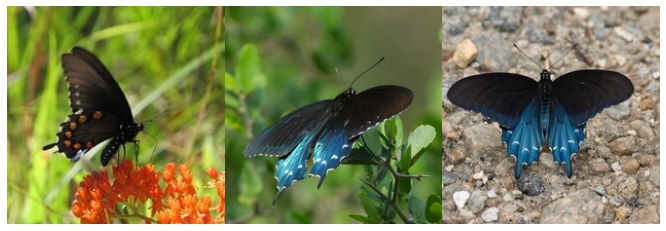

(<Figure size 1008x288 with 6 Axes>,
 <mpl_toolkits.axes_grid1.axes_grid.ImageGrid at 0x7ff3100b60d0>)

In [19]:
exp.show_most_common(0, slice_=slice(0, 3))

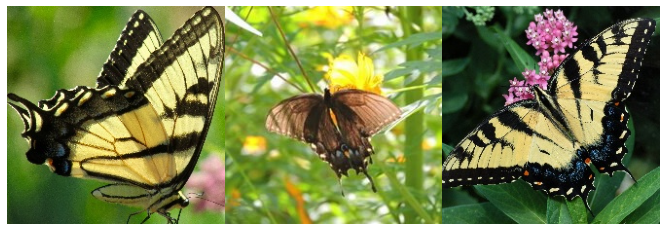

(<Figure size 1008x288 with 6 Axes>,
 <mpl_toolkits.axes_grid1.axes_grid.ImageGrid at 0x7ff31004dc50>)

In [24]:
exp.show_label('tiger', slice_=slice(0, 3))

In [25]:
metrics = [error_rate, F1Score(average='macro')]

In [26]:
probs_fn = partial(clf.baseline.fixed_probs, class_id=2)
clf.baseline.calculate_metrics(dls.train, metrics, probs_fn)

{'error_rate': TensorBase(0.7574), 'f1_score': 0.06506986027944113}

In [28]:
probs_fn = clf.baseline.random_probs
clf.baseline.calculate_metrics(dls.train, metrics, probs_fn)

{'error_rate': TensorBase(0.8021), 'f1_score': 0.19550461853379897}